In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("Iris.csv")
print("Dataset Loaded Successfully!\n")
print(df.head())

if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

Dataset Loaded Successfully!

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# Split Data and Normalize Features

X = df.drop('Species', axis=1)
y = df['Species']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize (Standardize) features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

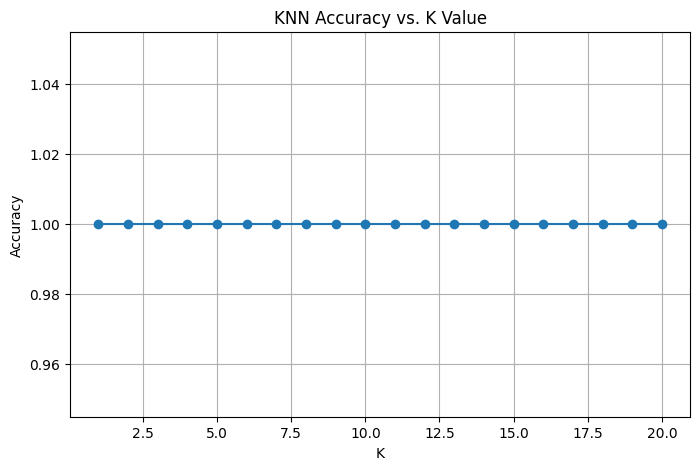

Best K value: 1 with accuracy 1.0000


In [5]:
# rain KNN Model with different K values

accuracy_scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plot accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(range(1,21), accuracy_scores, marker='o')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

best_k = np.argmax(accuracy_scores) + 1
print(f"Best K value: {best_k} with accuracy {accuracy_scores[best_k-1]:.4f}")

In [6]:
# Evaluate Model Performance

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


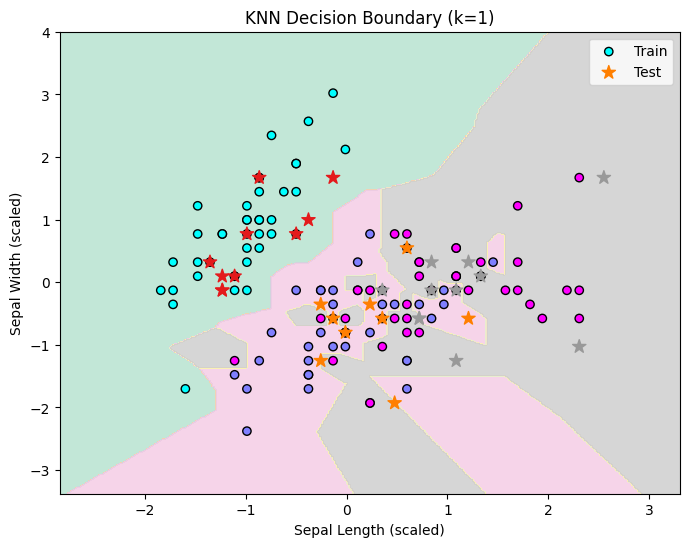

In [7]:
# Visualize Decision Boundaries (Using first 2 features)

X_vis = X.iloc[:, :2].values
y_vis = y.values

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

scaler_v = StandardScaler()
X_train_v = scaler_v.fit_transform(X_train_v)
X_test_v = scaler_v.transform(X_test_v)

knn_v = KNeighborsClassifier(n_neighbors=best_k)
knn_v.fit(X_train_v, y_train_v)

x_min, x_max = X_train_v[:, 0].min() - 1, X_train_v[:, 0].max() + 1
y_min, y_max = X_train_v[:, 1].min() - 1, X_train_v[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_v.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, alpha=0.8)
plt.scatter(X_train_v[:, 0], X_train_v[:, 1], c=y_train_v, cmap=plt.cm.cool, edgecolor='k', label='Train')
plt.scatter(X_test_v[:, 0], X_test_v[:, 1], c=y_test_v, cmap=plt.cm.Set1, marker='*', s=100, label='Test')
plt.title(f"KNN Decision Boundary (k={best_k})")
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.legend()
plt.show()